# 数据爬取和解析

In [1]:
# 导入所需要的模块
import requests
import time            # 防止访问频繁被封ip
from bs4 import BeautifulSoup
import pandas as pd

headers = {
    'User-Agent': 'Mozilla/8.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.154.102 Safari/537.36'
}                                     # 模拟浏览器，有反爬虫

domain = 'https://sz.5i5j.com'        # 苏州地区的我爱我家url
type_ ='ershoufang'                   # 调查二手房数据
city = 'yuanqu'                       # 位置选择苏州园区的房子

apartments=[]                         # 定义一个存放数据的列表

# 构造爬取一页数据的函数
def pagefun(i):
    page_url = domain +'/'+type_+'/'+city+'/'+'n'+str(i)       # 构造当前页的url地址
    
    try:
        r = requests.get(page_url,headers=headers,timeout=10)
        print(page_url)
    except Exception as e:
        print('----------------->',e)

    soup=BeautifulSoup(r.text,"lxml")
    apartments=[]
    lists = soup.find_all(class_='listX')                  # 数据存在class为listX的节点下面
    
    for i in range(len(lists)):
        datas = lists[i].find_all(name='p')
        apartment=[]
        for data in datas:
            x = data.text
            apartment.append(x)
        apartments.append(apartment)
        
    return apartments

# 爬取100页的数据
for i in range(1,101):
    apartments += pagefun(i)
    time.sleep(1)

df=pd.DataFrame(apartments,columns=['数据','小区','发布动态','总价','单价'])
df.head(10)

https://sz.5i5j.com/ershoufang/yuanqu/n1
https://sz.5i5j.com/ershoufang/yuanqu/n2
https://sz.5i5j.com/ershoufang/yuanqu/n3
https://sz.5i5j.com/ershoufang/yuanqu/n4
https://sz.5i5j.com/ershoufang/yuanqu/n5
https://sz.5i5j.com/ershoufang/yuanqu/n6
https://sz.5i5j.com/ershoufang/yuanqu/n7
https://sz.5i5j.com/ershoufang/yuanqu/n8
https://sz.5i5j.com/ershoufang/yuanqu/n9
https://sz.5i5j.com/ershoufang/yuanqu/n10
https://sz.5i5j.com/ershoufang/yuanqu/n11
https://sz.5i5j.com/ershoufang/yuanqu/n12
https://sz.5i5j.com/ershoufang/yuanqu/n13
https://sz.5i5j.com/ershoufang/yuanqu/n14
https://sz.5i5j.com/ershoufang/yuanqu/n15
https://sz.5i5j.com/ershoufang/yuanqu/n16
https://sz.5i5j.com/ershoufang/yuanqu/n17
https://sz.5i5j.com/ershoufang/yuanqu/n18
https://sz.5i5j.com/ershoufang/yuanqu/n19
https://sz.5i5j.com/ershoufang/yuanqu/n20
https://sz.5i5j.com/ershoufang/yuanqu/n21
https://sz.5i5j.com/ershoufang/yuanqu/n22
https://sz.5i5j.com/ershoufang/yuanqu/n23
https://sz.5i5j.com/ershoufang/yuanqu/n24
h

,数据,小区,发布动态,总价,单价
0,3室2厅1卫·88 平米 · 南北 · 中楼层/14层 · 精装 · 20...,青剑湖 天著湖韵花园二区,1 人关注 · 近30天带看 7 次 · 2019-11-21发布,300万,单价34091元/m²
1,3室2厅1卫·117.58 平米 · 南 · 低楼层/4层 · 简装 · ...,东环 富华苑,3 人关注 · 近30天带看 4 次 · 2020-04-01发布,326万,单价27726元/m²
2,3室2厅1卫·88.2 平米 · 南北 · 高楼层/18层 · 精装 · ...,青剑湖 优步花园,3 人关注 · 近30天带看 5 次 · 2019-11-24发布,295万,单价33447元/m²
3,3室2厅2卫·125 平米 · 南北 · 底层/5层 · 中装 · 2004年建,娄葑 新华苑 · 距离地铁墅浦路北站...,2 人关注 · 近30天带看 1 次 · 2019-08-13发布,315万,单价25200元/m²
4,4室2厅2卫·112.54 平米 · 南北 · 中楼层/8层 · 简装 · ...,青剑湖 优步花园,0 人关注 · 近30天带看 2 次 · 2019-11-28发布,420万,单价37320元/m²
5,3室2厅2卫·137.2 平米 · 南北 · 高楼层/30层 · 简装 · ...,东环 冠南苑,1 人关注 · 近30天带看 4 次 · 2019-08-07发布,340万,单价24781元/m²
6,3室1厅1卫·87.05 平米 · 南北 · 高楼层/6层 · 精装 · ...,东环 东港二村 · 距离地铁东环路5...,1 人关注 · 近30天带看 1 次 · 2020-04-28发布,320万,单价36760元/m²
7,1室2厅1卫·62.04 平米 · 南北 · 中楼层/18层 · 精装 · ...,东环 优山美地 · 距离地铁墅浦路北...,2 人关注 · 近30天带看 1 次 · 2020-06-12发布,190万,单价30625元/m²
8,3室2厅2卫·136.95 平米 · 南北 · 低楼层/26层 · 精装 ·...,湖东邻里 澜山澜二期,1 人关注 · 近30天带看 0 次 · 2019-05-06发布,629万,单价45929元/m²
9,2室2厅1卫·82.89 平米 · 南北 · 低楼层/6层 · 简装 · ...,东环 杨枝新村,1 人关注 · 近30天带看 3 次 · 2017-10-13发布,207万,单价24973元/m²


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   数据      3000 non-null   object
 1   小区      3000 non-null   object
 2   发布动态    3000 non-null   object
 3   总价      3000 non-null   object
 4   单价      3000 non-null   object
dtypes: object(5)
memory usage: 117.3+ KB


In [3]:
df.to_excel("爬取的数据.xlsx")

# 数据处理

## 1.将数据描述分解 

In [4]:
#户型，面积，朝向，楼层，装修
df['户型'] = None
df['建筑面积'] = None
df['朝向'] = None
df['楼层'] = None
df['装修'] = None
df['建造时间'] = None
for i in range(df.shape[0]):
    descs = df.loc[i,'数据'].split('·')  #将数据描述拆开
    for desc in descs:
        if("室" in desc or "厅" in desc or "卫" in desc):
            df.loc[i,'户型'] = desc.strip()
        if("平米" in desc):
            df.loc[i,'建筑面积'] = desc.strip()
        if("东" in desc or "南" in desc or "西" in desc or "北" in desc):
            df.loc[i,'朝向'] = desc.strip()
        if("层" in desc):
            df.loc[i,'楼层'] = desc.strip()
        if("精装" in desc or "中装" in desc or "简装" in desc or "毛坯" in desc):
            df.loc[i,'装修'] = desc.strip()
        if("年" in desc):
            df.loc[i,'建造时间'] = desc.strip()
df.head(5)

,数据,小区,发布动态,总价,单价,户型,建筑面积,朝向,楼层,装修,建造时间
0,3室2厅1卫·88 平米 · 南北 · 中楼层/14层 · 精装 · 20...,青剑湖 天著湖韵花园二区,1 人关注 · 近30天带看 7 次 · 2019-11-21发布,300万,单价34091元/m²,3室2厅1卫,88 平米,南北,中楼层/14层,精装,2016年建
1,3室2厅1卫·117.58 平米 · 南 · 低楼层/4层 · 简装 · ...,东环 富华苑,3 人关注 · 近30天带看 4 次 · 2020-04-01发布,326万,单价27726元/m²,3室2厅1卫,117.58 平米,南,低楼层/4层,简装,2002年建
2,3室2厅1卫·88.2 平米 · 南北 · 高楼层/18层 · 精装 · ...,青剑湖 优步花园,3 人关注 · 近30天带看 5 次 · 2019-11-24发布,295万,单价33447元/m²,3室2厅1卫,88.2 平米,南北,高楼层/18层,精装,2015年建
3,3室2厅2卫·125 平米 · 南北 · 底层/5层 · 中装 · 2004年建,娄葑 新华苑 · 距离地铁墅浦路北站...,2 人关注 · 近30天带看 1 次 · 2019-08-13发布,315万,单价25200元/m²,3室2厅2卫,125 平米,南北,底层/5层,中装,2004年建
4,4室2厅2卫·112.54 平米 · 南北 · 中楼层/8层 · 简装 · ...,青剑湖 优步花园,0 人关注 · 近30天带看 2 次 · 2019-11-28发布,420万,单价37320元/m²,4室2厅2卫,112.54 平米,南北,中楼层/8层,简装,2015年建


In [5]:
df.drop(columns=["数据","发布动态"],inplace=True)      # 删除已经无用的属性列

In [6]:
df.head(5)

,小区,总价,单价,户型,建筑面积,朝向,楼层,装修,建造时间
0,青剑湖 天著湖韵花园二区,300万,单价34091元/m²,3室2厅1卫,88 平米,南北,中楼层/14层,精装,2016年建
1,东环 富华苑,326万,单价27726元/m²,3室2厅1卫,117.58 平米,南,低楼层/4层,简装,2002年建
2,青剑湖 优步花园,295万,单价33447元/m²,3室2厅1卫,88.2 平米,南北,高楼层/18层,精装,2015年建
3,娄葑 新华苑 · 距离地铁墅浦路北站...,315万,单价25200元/m²,3室2厅2卫,125 平米,南北,底层/5层,中装,2004年建
4,青剑湖 优步花园,420万,单价37320元/m²,4室2厅2卫,112.54 平米,南北,中楼层/8层,简装,2015年建


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   小区      3000 non-null   object
 1   总价      3000 non-null   object
 2   单价      3000 non-null   object
 3   户型      3000 non-null   object
 4   建筑面积    3000 non-null   object
 5   朝向      2992 non-null   object
 6   楼层      3000 non-null   object
 7   装修      2874 non-null   object
 8   建造时间    1122 non-null   object
dtypes: object(9)
memory usage: 211.1+ KB


建造时间缺失太严重，后续操作不考虑  
小区对预测无影响，也删除

In [8]:
del df["建造时间"]
del df["小区"]

## 2. 将户型数据继续拆分

In [9]:
df[["室","厅","卫"]] = df["户型"].str.extract("(.+)室(.+)厅(.+)卫") # 利用正则表达式提取数据

In [10]:
df.head(10)

,总价,单价,户型,建筑面积,朝向,楼层,装修,室,厅,卫
0,300万,单价34091元/m²,3室2厅1卫,88 平米,南北,中楼层/14层,精装,3,2,1
1,326万,单价27726元/m²,3室2厅1卫,117.58 平米,南,低楼层/4层,简装,3,2,1
2,295万,单价33447元/m²,3室2厅1卫,88.2 平米,南北,高楼层/18层,精装,3,2,1
3,315万,单价25200元/m²,3室2厅2卫,125 平米,南北,底层/5层,中装,3,2,2
4,420万,单价37320元/m²,4室2厅2卫,112.54 平米,南北,中楼层/8层,简装,4,2,2
5,340万,单价24781元/m²,3室2厅2卫,137.2 平米,南北,高楼层/30层,简装,3,2,2
6,320万,单价36760元/m²,3室1厅1卫,87.05 平米,南北,高楼层/6层,精装,3,1,1
7,190万,单价30625元/m²,1室2厅1卫,62.04 平米,南北,中楼层/18层,精装,1,2,1
8,629万,单价45929元/m²,3室2厅2卫,136.95 平米,南北,低楼层/26层,精装,3,2,2
9,207万,单价24973元/m²,2室2厅1卫,82.89 平米,南北,低楼层/6层,简装,2,2,1


In [11]:
del df["户型"]

### 替换前

In [12]:
df["室"].value_counts()

3    1322
2    1245
4     244
1     155
5      28
6       6
Name: 室, dtype: int64

In [13]:
df["厅"].value_counts()

2    2437
1     556
3       5
多       2
Name: 厅, dtype: int64

In [14]:
df["卫"].value_counts()

1    2062
2     908
多      13
3      13
5       2
4       2
Name: 卫, dtype: int64

由于数据中存在多厅多卫，所以不能完全转化为数据，我们将多厅和多卫均定义为3

### 替换后

In [15]:
df.loc[df['厅'] == '多','厅'] = 3
df.loc[df['卫'] == '多','卫'] = 3

In [16]:
df["室"] = df["室"].astype(int)
df["厅"] = df["厅"].astype(int)
df["卫"] = df["卫"].astype(int)

In [17]:
df["厅"].value_counts()

2    2437
1     556
3       7
Name: 厅, dtype: int64

In [18]:
df["卫"].value_counts()

1    2062
2     908
3      26
5       2
4       2
Name: 卫, dtype: int64

## 3.将建筑面积去除平米，转化为float

### 替换前

In [19]:
df.loc[1,'建筑面积']

'117.58  平米'

### 替换后

In [20]:
df["建筑面积"] = df["建筑面积"].map(lambda x: x.replace("平米","").strip())  # 先将平米全都替换成空,然后对字符串去空格

In [21]:
df.loc[1,'建筑面积']

'117.58'

In [22]:
df["建筑面积"] = df["建筑面积"].astype(float)
df.head()

,总价,单价,建筑面积,朝向,楼层,装修,室,厅,卫
0,300万,单价34091元/m²,88.00,南北,中楼层/14层,精装,3,2,1
1,326万,单价27726元/m²,117.58,南,低楼层/4层,简装,3,2,1
2,295万,单价33447元/m²,88.20,南北,高楼层/18层,精装,3,2,1
3,315万,单价25200元/m²,125.00,南北,底层/5层,中装,3,2,2
4,420万,单价37320元/m²,112.54,南北,中楼层/8层,简装,4,2,2


## 4.总价去除万，转换成float

### 替换前

In [23]:
df.loc[1,'总价']

'326万'

### 替换后

In [24]:
df["总价"] = df["总价"].map(lambda x:x.replace("万","").strip())

In [25]:
df.loc[1,'总价']

'326'

In [26]:
df["总价"] = df["总价"].astype(float)
df.head()

,总价,单价,建筑面积,朝向,楼层,装修,室,厅,卫
0,300.0,单价34091元/m²,88.00,南北,中楼层/14层,精装,3,2,1
1,326.0,单价27726元/m²,117.58,南,低楼层/4层,简装,3,2,1
2,295.0,单价33447元/m²,88.20,南北,高楼层/18层,精装,3,2,1
3,315.0,单价25200元/m²,125.00,南北,底层/5层,中装,3,2,2
4,420.0,单价37320元/m²,112.54,南北,中楼层/8层,简装,4,2,2


## 5.单价取数字

In [27]:
df.loc[1,'单价']

'单价27726元/m²'

In [28]:
df["单价"] = df["单价"].str.extract("单价(\d+)元/m²")

In [29]:
df.loc[1,'单价']

'27726'

In [30]:
df["单价"] = df["单价"].astype(float)
df.head()

,总价,单价,建筑面积,朝向,楼层,装修,室,厅,卫
0,300.0,34091.0,88.00,南北,中楼层/14层,精装,3,2,1
1,326.0,27726.0,117.58,南,低楼层/4层,简装,3,2,1
2,295.0,33447.0,88.20,南北,高楼层/18层,精装,3,2,1
3,315.0,25200.0,125.00,南北,底层/5层,中装,3,2,2
4,420.0,37320.0,112.54,南北,中楼层/8层,简装,4,2,2


## 6.楼层转换

In [31]:
df["楼层"] = df["楼层"].str.extract("(.+)/.+层")
df.head()

,总价,单价,建筑面积,朝向,楼层,装修,室,厅,卫
0,300.0,34091.0,88.00,南北,中楼层,精装,3,2,1
1,326.0,27726.0,117.58,南,低楼层,简装,3,2,1
2,295.0,33447.0,88.20,南北,高楼层,精装,3,2,1
3,315.0,25200.0,125.00,南北,底层,中装,3,2,2
4,420.0,37320.0,112.54,南北,中楼层,简装,4,2,2


# 线性回归

由于目标总价是连续型，而朝向，楼层等都是有限的离散型数据，所以我们要采用one-hot编码，对其重新编码。

In [32]:
# 朝向取出dummy_virable编码
df_direction = pd.get_dummies(df["朝向"])
print(df_direction.shape[0])
df_direction.head(5)

3000


,东,东北,东南,东西,北,南,南东北,南北,西,西北,西南
0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0


In [34]:
# 装修取出dummy virable
df_decoration = pd.get_dummies(df["装修"])
print(df_decoration.shape[0])
df_decoration.head()

3000


,中装,毛坯,简装,精装
0,0,0,0,1
1,0,0,1,0
2,0,0,0,1
3,1,0,0,0
4,0,0,1,0


In [35]:
# 楼层取出流程dummy variable
df_floor = pd.get_dummies(df["楼层"])
print(df_floor.shape[0])
df_floor.head()

3000


,中楼层,低楼层,底层,顶层,高楼层
0,1,0,0,0,0
1,0,1,0,0,0
2,0,0,0,0,1
3,0,0,1,0,0
4,1,0,0,0,0


In [36]:
#删除朝向，楼层，装修
del df["朝向"]
del df["楼层"]
del df["装修"]

In [37]:
df.head()

,总价,单价,建筑面积,室,厅,卫
0,300.0,34091.0,88.00,3,2,1
1,326.0,27726.0,117.58,3,2,1
2,295.0,33447.0,88.20,3,2,1
3,315.0,25200.0,125.00,3,2,2
4,420.0,37320.0,112.54,4,2,2


In [38]:
#将朝向，装修，楼层的dummy variable 拼接到df
df = pd.concat([df,df_decoration,df_direction,df_floor],axis=1)

In [39]:
df.head()

,总价,单价,建筑面积,室,厅,卫,中装,毛坯,简装,精装,...,南东北,南北,西,西北,西南,中楼层,低楼层,底层,顶层,高楼层
0,300.0,34091.0,88.00,3,2,1,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0
1,326.0,27726.0,117.58,3,2,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
2,295.0,33447.0,88.20,3,2,1,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1
3,315.0,25200.0,125.00,3,2,2,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
4,420.0,37320.0,112.54,4,2,2,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0


In [40]:
# 删除逻辑错误的数据
del df["东西"]
del df["南东北"]
del df["南北"]

# 删除多重共线性的数据
del df['西']
del df["毛坯"]
del df['中楼层']

In [41]:
df.head()

,总价,单价,建筑面积,室,厅,卫,中装,简装,精装,东,东北,东南,北,南,西北,西南,低楼层,底层,顶层,高楼层
0,300.0,34091.0,88.00,3,2,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,326.0,27726.0,117.58,3,2,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0
2,295.0,33447.0,88.20,3,2,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1
3,315.0,25200.0,125.00,3,2,2,1,0,0,0,0,0,0,0,0,0,0,1,0,0
4,420.0,37320.0,112.54,4,2,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   总价      3000 non-null   float64
 1   单价      3000 non-null   float64
 2   建筑面积    3000 non-null   float64
 3   室       3000 non-null   int32  
 4   厅       3000 non-null   int32  
 5   卫       3000 non-null   int32  
 6   中装      3000 non-null   uint8  
 7   简装      3000 non-null   uint8  
 8   精装      3000 non-null   uint8  
 9   东       3000 non-null   uint8  
 10  东北      3000 non-null   uint8  
 11  东南      3000 non-null   uint8  
 12  北       3000 non-null   uint8  
 13  南       3000 non-null   uint8  
 14  西北      3000 non-null   uint8  
 15  西南      3000 non-null   uint8  
 16  低楼层     3000 non-null   uint8  
 17  底层      3000 non-null   uint8  
 18  顶层      3000 non-null   uint8  
 19  高楼层     3000 non-null   uint8  
dtypes: float64(3), int32(3), uint8(14)
memory usage: 146.6 KB


In [43]:
df.to_excel("处理后的数据.xlsx")

## 1. 单元线性回归

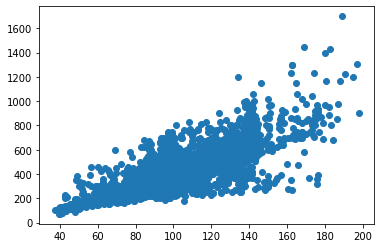

In [44]:
# 绘制建筑面积和总价的散点图
import matplotlib.pyplot as plt
df1 = df[df["建筑面积"]<=200]
#print(df1.count())
area = df1[["建筑面积"]]
price = df1[["总价"]]
plt.scatter(area,price)
plt.show()

In [45]:
#使用线性回归拟合
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
#训练
model = linear.fit(area,price)
print(model.intercept_,model.coef_)

[-131.18728325] [[5.46659644]]


In [46]:
#预测
price_ = model.predict(area)

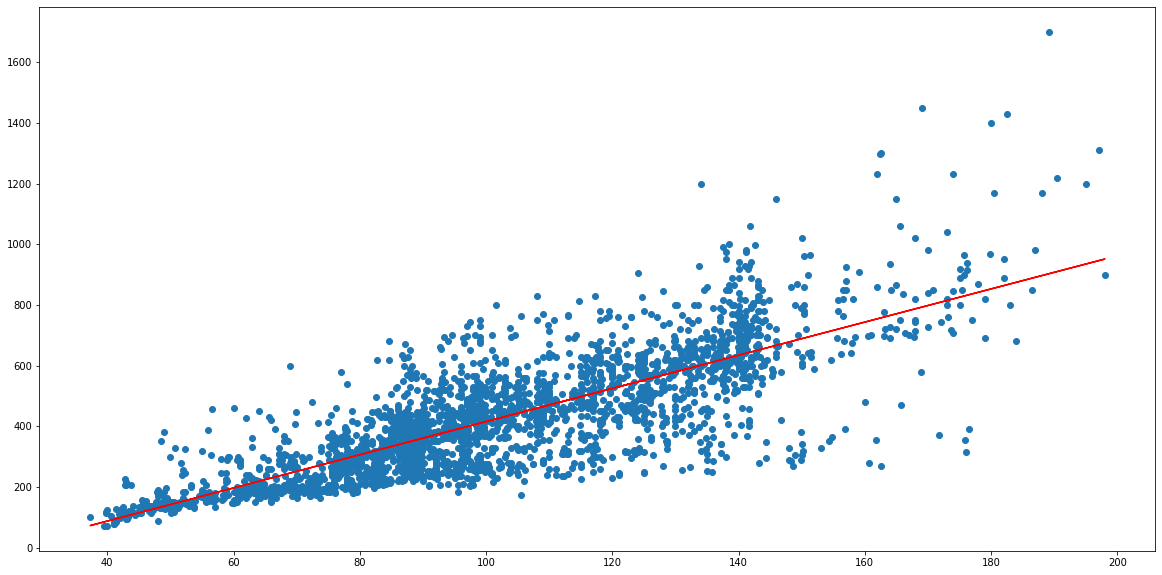

In [47]:
# 将预测的房价和原始的数据的散点图绘制在一张图上
# 绘制建筑面积和总价的散点图
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
area = df1[["建筑面积"]]
price = df1[["总价"]]
plt.scatter(area,price)
plt.plot(area,price_,color="red")
plt.show()

## 2.多元线性回归

### 2.1 X和Y的划分

In [49]:
cols = ["建筑面积","室","厅","卫","中装","简装","精装","东","东北","东南","北","南","西北","西南","低楼层","底层","顶层","高楼层"]
X = df1[cols]
Y = df1["总价"]

### 2.2 训练数据和测试数据的划分

In [52]:
# 划分测试集和训练集
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=10)

In [53]:
#多元线性回归
linear_multi = LinearRegression()
model = linear_multi.fit(x_train,y_train)
#多元线性回归的截距和回归系数
print(model.intercept_,model.coef_)

-147.58082177839168 [  5.16582191   2.64151903  -2.13150217  18.62063964 -20.4132058
   7.89634773  26.49400442  -2.26289789  58.38560159  39.58934378
  88.05087124   7.40214307 -47.32321583   1.06437488  -4.5420361
 -29.83305185 -40.03934519  13.50214872]


In [54]:
predict_result = model.predict(x_test)
score = model.score(x_test,y_test)
print('R-scores:',score)

R-scores: 0.6496198624729579


使用多种特征的组合都可以预测房价，我们需要使用假设检验法，选出最佳的特征组合

In [55]:
#使用假设检验法
import statsmodels.api as sm
Y = df1["总价"].values
X = df1[cols]
X_ = sm.add_constant(X)
#使用最小平方法
result = sm.OLS(Y,X_)
#fit方法运行计算
summary = result.fit()
#调用summary2方法，打印出假设检验的系列信息
print(summary.summary2())

                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.659     
Dependent Variable: y                AIC:                36568.0148
Date:               2020-07-03 23:39 BIC:                36681.9896
No. Observations:   2977             Log-Likelihood:     -18265.   
Df Model:           18               F-statistic:        320.6     
Df Residuals:       2958             Prob (F-statistic): 0.00      
R-squared:          0.661            Scale:              12573.    
--------------------------------------------------------------------
            Coef.    Std.Err.     t     P>|t|     [0.025     0.975] 
--------------------------------------------------------------------
const     -130.3184   13.6148  -9.5718  0.0000  -157.0138  -103.6230
建筑面积         5.0668    0.1496  33.8670  0.0000     4.7735     5.3601
室            3.3407    4.4238   0.7552  0.4502    -5.3332    12.0147
厅           -1.7196    6.4044  -0.2685  0.7883   -14.2771   

In [59]:
cols2 = ['建筑面积','卫', '中装', '精装', '东', '北', '南', '西南', '底层','顶层','高楼层']
# 划分测试集和训练集
X = df1[cols2]
Y = df1['总价']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=10)
# 多元线性回归2
linear_multi = LinearRegression()
model1 = linear_multi.fit(x_train,y_train)
print(model1.intercept_,model1.coef_)
print(model1.score(x_test,y_test))

-144.4971093645384 [  5.1819451   19.44211249 -24.39439398  21.73268578  -1.96989973
  86.06446294   7.10543277  -0.73834871 -28.06995598 -37.25920896
  15.29751648]
0.6512740673401813


### 评价指标

In [60]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
print('R-squares:%s'%(r2_score(model1.predict(x_test),y_test)))
print('MAE:%s'%(mean_absolute_error(model1.predict(x_test),y_test)))
print('MSE:%s'%(mean_squared_error(model1.predict(x_test),y_test)))

R-squares:0.48218499540693127
MAE:79.68231752939262
MSE:13317.957653800559
